# Confidence Intervals

#### T-tests
Often used when the data *would* be normal, if we know the population variance.
- One-sample t-test: Test the mean of a distribution.
- Two-sample t-test: Test if the means of two distributions differ.

**Standard Error**: Standard error is often a confusing topic. Why do we divide $\sigma$ by $\sqrt{n}$? It's called the *standard error* because that number is the typical *error* of the point estimate, a.k.a. the standard deviation of the distribution of sample means!

This can be estimated by resampling.

The analytical standard error of a 100-sample mean drawn from a Gaussian distribution, with (mean = 50, std.dev = 15) is:
$$SE == \frac{\sigma}{\sqrt{n} } = \frac{15}{\sqrt{100}} = 1.5$$

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
from ggplot import *

In [55]:
# Now, in code...
def estimate_standard_error(trials):
    N = 100
    MEAN = 50
    STDDEV = 15
    
    sampled_means = []
    for _ in range(trials):
        sample = np.random.normal(loc=MEAN, scale=STDDEV, size=N)
        sampled_means.append(sample.mean())

    return np.std(sampled_means)

print("Esimated SE:", estimate_standard_error(100))

Esimated SE: 1.6400749285945182


Pretty close. And as we increase the number of trials, it converges to 1.5.

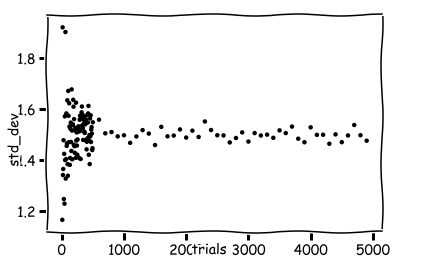

<ggplot: (-9223372036564840118)>

In [56]:
intervals = np.concatenate([np.arange(10, 500, 5), np.arange(500, 5000, 100)])
standard_errors = pd.DataFrame({
    'trials': intervals,
    'std_dev': [estimate_standard_error(i) for i in intervals]
})
ggplot(standard_errors, aes(x='trials', y='std_dev')) + geom_point() + theme_xkcd()